In [1]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


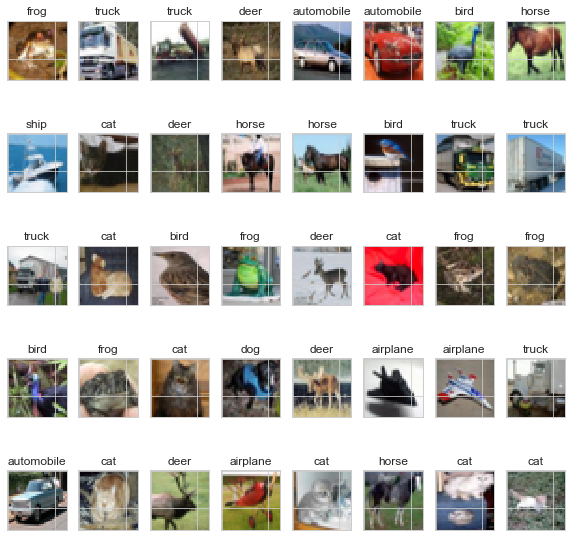

In [37]:
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x軸をオフ
    plt.tick_params(labelleft="off",left="off") # y軸をオフ
    plt.imshow(im)

plt.show()

In [39]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/kujira/.pyenv/versions/anaconda3-5.0.0/envs/py35/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.8925 - acc: 0.3326 - val_loss: 1.7611 - val_acc: 0.3787
Epoch 2/50
50000/50000 [==============================] - 50s 1ms/step - loss: 1.6997 - acc: 0.3939 - val_loss: 1.6540 - val_acc: 0.4111
Epoch 3/50
50000/50000 [==============================] - 57s 1ms/step - loss: 1.6374 - acc: 0.4186 - val_loss: 1.6103 - val_acc: 0.4252
Epoch 4/50
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5955 - acc: 0.4326 - val_loss: 1.6154 - val_acc: 0.4275
Epoch 5/50
50000/50000 [==============================] - 55s 1ms/step - loss: 1.5700 - acc: 0.4441 - val_loss: 1.5674 - val_acc: 0.4389
Epoch 6/50
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5470 - acc: 0.4537 - val_loss: 1.5594 - val_acc: 0.4511
Epoch 7/50
50000/50000 [==============================] - 53s 1ms/step - loss: 1.5231 - acc: 0.4601 - val_loss: 1.5806 - val_acc

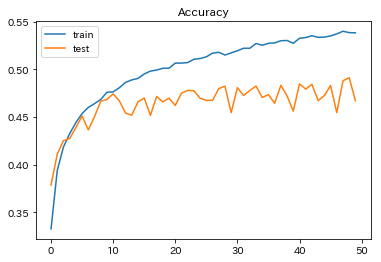

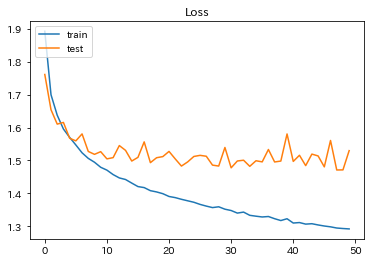

In [6]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3

# データを読み込む --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# データを一次元配列に変換 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255
# ラベルデータをOne-Hot形式に変換
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを定義 --- (*3)
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(im_size,)))
model.add(Dense(num_classes, activation='softmax'))

# モデルをコンパイル --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 学習を実行 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=50,
    verbose=1,
    validation_data=(X_test, y_test))

# モデルを評価 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

# 学習の様子をグラフへ描画 --- (*7)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [7]:
model.save_weights('cifar10-weight.h5')

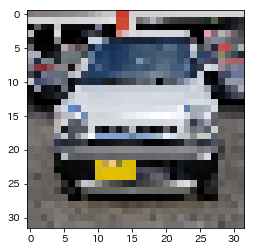

airplane = 19
automobile = 73
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 1
ship = 0
truck = 4
---
予測した結果= automobile


In [130]:
import cv2
import numpy as np
# ラベル情報
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# モデルデータを読み込み
model.load_weights('cifar10-mlp-weight.h5')

# OpenCVを使って画像を読み込む
im = cv2.imread('test-car.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 画像を出力
plt.show()

# MLPで学習した画像データに合わせる
im = im.reshape(im_size).astype('float32') / 255
# 予測する
r = model.predict(np.array([im]), batch_size=32,verbose=1)
res = r[0]
# 結果を表示する
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("予測した結果=", labels[res.argmax()])


In [134]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 結果→ 2
print(np.array([1, 3, 2, 9]).argmax()) # 結果→ 3
print(np.array([9, 0, 2, 3]).argmax()) # 結果→ 0

2
3
0
